# SHAP (SHapley Additive exPlanations)

The SHAP (SHapley Additive exPlanations) library is a popular tool for interpreting the output of machine learning models. This notebook provides a tutorial about this tool. 

In this tutorial, we use a large part of Shap values tutorial from the [githab of shap](https://github.com/slundberg/shap).

In [43]:
# pip install shap

In [44]:
import shap

We have to call ``initjs``  for the interactive plots to work properly in this notebook.

In [45]:
shap.initjs() 

Let's first explore shap values for a dataset with numeric features. We are going to use a cleaned version of the [Heart Disease dataset](https://archive.ics.uci.edu/dataset/45/heart+disease). The target field refers to the presence of heart disease in the patient. It is integer valued, either 0 (no presence) or 1 (presence). 

In [46]:
import pandas as pd
df = pd.read_csv('../data/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [47]:
X = df.drop(columns=['target'])
y = df.target

In [48]:
y.unique()

array([1, 0])

In [49]:
X.shape

(303, 13)

In [50]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [51]:
X.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


In [52]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 30.9 KB


In [53]:
y.shape

(303,)

In [54]:
y.mean()

0.5445544554455446

Now let us fit a regression model to be later used in the next examples. We are going to use the catboost implementation of XGBoost. Notice, however, that the SHAP library can be use to interprete many other machine learning algorithms.

In [55]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X.values, y.values)

RandomForestClassifier(random_state=42)

After the model is built, we can use the SHAP library to interpret its prediction behaviour.


It's worth mentioning that the TreeExplainer is specifically designed for tree-based models. If you are working with a different type of model, you might use a different explainer, such as KernelExplainer for explaining any model with a callable prediction function, or DeepExplainer for deep learning models. The appropriate explainer depends on the type of model you are explaining.

In [56]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

The code above is using the SHAP library to generate the SHAP values for a tree-based model. Let's break down the code:

- ``explainer = shap.TreeExplainer(model)``: a ``TreeExplainer`` object is created by passing the machine learning model (``model``) to it. The TreeExplainer is a class in the SHAP library designed specifically for explaining models built on decision trees, such as Random Forests, Gradient Boosting Machines, or other tree-based models. This step initializes the explainer, preparing it to calculate SHAP values for a given dataset. Once the TreeExplainer is created, it can be used to compute SHAP values for a set of instances in the dataset (``X``). 

- ``shap_values = explainer.shap_values(X)``: The ``shap_values`` variable will contain the SHAP values for each feature and each instance in the dataset. If the model is a binary classification model, ``shap_values`` will have shape `(n_samples, n_features)``, where `n_samples`` is the number of instances in the dataset, and n_features is the number of features. For a regression model or a multi-class classification model, shap_values may have additional dimensions to represent different output dimensions.

The ``shape_value`` variable is a list of two arrays. This is because the model is a binary classifier.

If the model is a binary classifier, ``shap_values`` will have shape ``(n_samples, n_features)``, where 
- ``n_samples`` is the number of instances in the dataset,
- ``n_features`` is the number of features.

In [57]:
shap_values

[array([[ 0.01987538,  0.01733682, -0.12077539, ...,  0.00824249,
         -0.11867067, -0.06397138],
        [-0.06821946,  0.01102435, -0.08678724, ...,  0.00937457,
         -0.09366022, -0.07832387],
        [-0.04772488, -0.03071607, -0.06933326, ..., -0.04148308,
         -0.07934624, -0.07835063],
        ...,
        [ 0.00724164,  0.02524564,  0.0971438 , ...,  0.05288109,
          0.11929305,  0.0905955 ],
        [ 0.02182169,  0.01797617,  0.10484904, ...,  0.04582704,
          0.08008002,  0.10062876],
        [ 0.10240813, -0.0289855 , -0.02263593, ...,  0.08453395,
          0.16850255, -0.06070652]]),
 array([[-0.01987538, -0.01733682,  0.12077539, ..., -0.00824249,
          0.11867067,  0.06397138],
        [ 0.06821946, -0.01102435,  0.08678724, ..., -0.00937457,
          0.09366022,  0.07832387],
        [ 0.04772488,  0.03071607,  0.06933326, ...,  0.04148308,
          0.07934624,  0.07835063],
        ...,
        [-0.00724164, -0.02524564, -0.0971438 , ..., -

In [58]:
shap_values[0].shape

(303, 13)

The shap values for the first instance of the dataset and for the negatica class (=0) are stored in ``shap_values[0][0]``:

In [59]:
shap_values[0][0]

array([ 0.01987538,  0.01733682, -0.12077539, -0.02592511, -0.02675083,
       -0.02125473, -0.00576532, -0.03934197, -0.04066547,  0.05958036,
        0.00824249, -0.11867067, -0.06397138])

The shap values for the first instance of the dataset and for the positive class (=1) are stored in ``shap_values[1][0]``:

In [60]:
shap_values[1][0]

array([-0.01987538, -0.01733682,  0.12077539,  0.02592511,  0.02675083,
        0.02125473,  0.00576532,  0.03934197,  0.04066547, -0.05958036,
       -0.00824249,  0.11867067,  0.06397138])

The expected value for each class (considering all the instances) is stored in the property ``expected_value``:

In [61]:
print(explainer.expected_value)

[0.45808581 0.54191419]


## Force Plots

A force plot is a visual representation of the impact of each feature on the model's prediction for a specific instance. This plot helps interpret the model's decision for that specific prediction by showing how each feature contributes to the difference between the model's output and the expected value.

To understand the force plot, let us consider the first instance in the dataset:

In [62]:
print(X.iloc[0,:])

age          63.0
sex           1.0
cp            3.0
trestbps    145.0
chol        233.0
fbs           1.0
restecg       0.0
thalach     150.0
exang         0.0
oldpeak       2.3
slope         0.0
ca            0.0
thal          1.0
Name: 0, dtype: float64


In [63]:
#X.iloc[0,2] = 0

In [64]:
print(X.iloc[0,:])

age          63.0
sex           1.0
cp            3.0
trestbps    145.0
chol        233.0
fbs           1.0
restecg       0.0
thalach     150.0
exang         0.0
oldpeak       2.3
slope         0.0
ca            0.0
thal          1.0
Name: 0, dtype: float64


For this first instance, the code below uses the model to predict its class:

In [65]:
first_instance = X.iloc[0,:].values.reshape(1, -1)
model.predict(first_instance)

array([1])

In [66]:
model.predict_proba(first_instance)

array([[0.1, 0.9]])

The model predicts that this first instance belongs to the **positive** class. The code block below uses the SHAP library to understand the importance of each  feature in producing the prediction for the first instance.

In [67]:
# visualize the first prediction's explanation
shap.force_plot(explainer.expected_value[0], shap_values[0][0], X.iloc[0,:])

The above explanation shows features each contributing to push the model output from the base value (the average model output over the training dataset we passed) to the model output. 
- Features pushing the prediction to a higher value are shown in red.
- Feature pushing the prediction to a lower value are in blue.

Notice that we can also generate the force plot in the context of the positive class:

In [68]:
# visualize the first prediction's explanation
shap.force_plot(explainer.expected_value[1], shap_values[1][0,:], X.iloc[0,:])

The above explanation is only for the first instance in the dataset. If we take many explanations such as the one shown above, rotate them 90 degrees, and then stack them horizontally, we can see explanations for an entire dataset (notice the resulting plot is interactive):

In [69]:
# visualize the training set predictions
shap.force_plot(explainer.expected_value[0], shap_values[0], X)

Notice that in the interactive plot above, we can control the variable presented in the X and Y axes. For example, if we define **age** and **f(x)** for the X and Y axes, respectively, we can see how the values of the age feature affect the model's output. Consistent with common knowledge, it seems that older people (age greater than 54) have more probability of suffering from a heart disease.

## Dependence Plots

To understand how a **single feature** effects the output of the model, we can plot the SHAP value of that feature vs. the value of the feature for all the examples in a dataset. Since SHAP values represent a feature's responsibility for a change in the model output, the plot below represents the change in predicted probability of heart disease as CP changes.

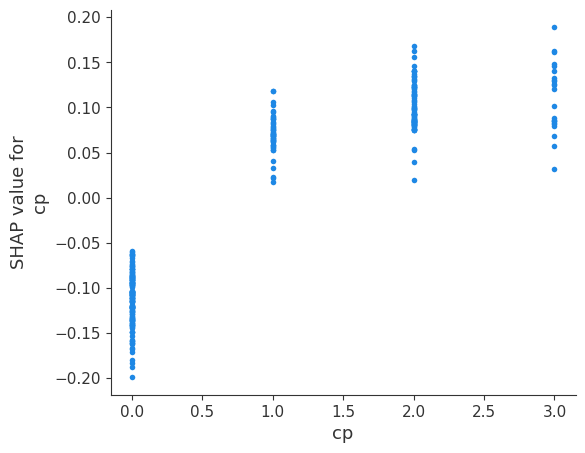

In [70]:
# create a SHAP dependence plot to show the effect of a single feature across the whole dataset
shap.dependence_plot("cp", shap_values[1], X, interaction_index=None)

 Vertical dispersion at a single value of CP represents interaction effects with other features. To help reveal these interactions, we can configure `dependence_plot` to select another feature for coloring. 

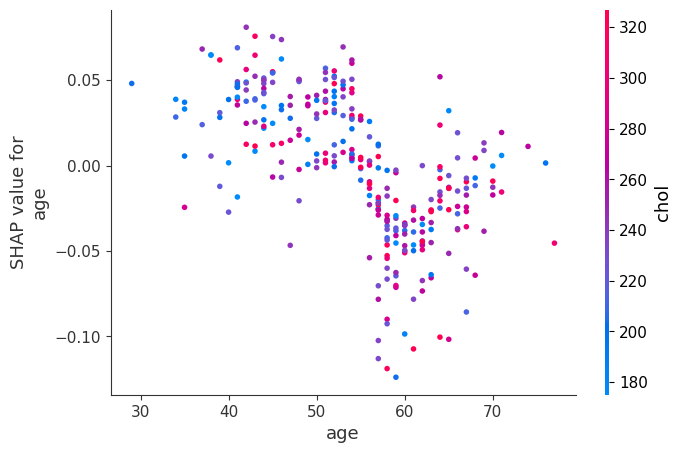

In [75]:
shap.dependence_plot("age", shap_values[1], X, interaction_index='chol')

## Summary Plots

To get an overview of which features are most important for a model we can plot the SHAP values of every feature for every sample. The plot below sorts features by the sum of SHAP value magnitudes over all samples, and uses SHAP values to show the distribution of the impacts each feature has on the model output. The color represents the feature value (red is high, blue is low). 

The summary plot below reveals, for example, that:

- CP (chesse pain) is the most important feature to predict the target;
- high values for the CP feature are associated to a greater probability of heart disease;
-  fbs (fasting blood sugar > 120 mg/dl) is the least important feature.

In [72]:
X.cp.unique()

array([3, 2, 1, 0])

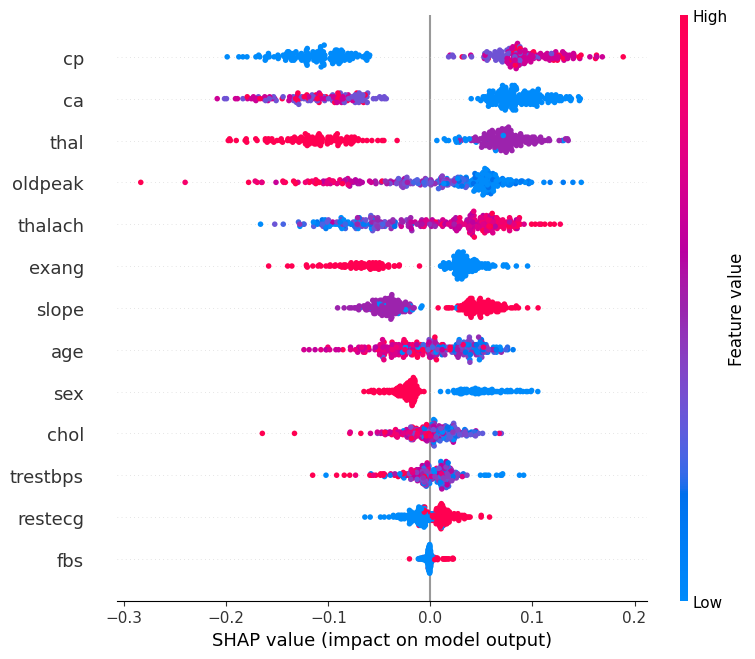

In [73]:
# summarize the effects of all the features
shap.summary_plot(shap_values[1], X)

You can choose to display on the summary plot only the most important features.

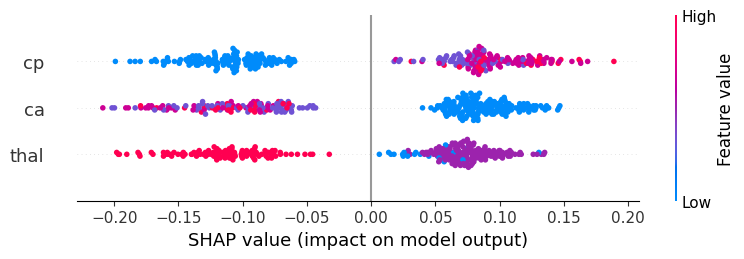

In [74]:
shap.summary_plot(shap_values[1], X, max_display=3)